### <b>[RQ7]</b> Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.

<b>7.1</b> What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

* We create two datasets from the starting ones, one containing the profile ids and number of likes of each post
and the second one ("folid") containing the profile ids and number of followers of each profile.
* We delete the lines that have missing values in followers and number of likes 

In [6]:
# posts dataset
fields=['profile_id','numbr_likes']
df_instagram_posts_RQ7=pd.read_csv('~/instagram_posts.csv',sep='\t',usecols=fields)
df_instagram_posts_RQ7.dropna(subset=['numbr_likes'], inplace=True)

In [12]:
df_instagram_profiles_RQ7=df_instagram_profiles_RQ5.copy()
folid=df_instagram_profiles_RQ7[['followers','profile_id']]
folid.dropna(subset=['followers'], inplace=True)

* We extract those profile_id that are present in both posts dataset and profiles dataset:

In [42]:
dp = df_instagram_profiles_RQ7[df_instagram_profiles_RQ7.profile_id.isin(dpost.profile_id.unique())] #2,207.207
df_instagram_posts_RQ7 = df_instagram_posts_RQ7[df_instagram_posts_RQ7.profile_id.isin(dp.profile_id)] #27,715.738 rows
df_instagram_posts_RQ7 = df_instagram_posts_RQ7.dropna() #25,132.446 rows

* We create a single dataset containing all profiles id with number of likes and followers:

In [28]:
followers_likes_RQ7=pd.merge(dpost,folid, on='profile_id') #24,708.644 rows

* Now, through a "mask" we extract only those values that satisfy our condition, that the number of likes of a post are more than 20% of the profile's follower number:

In [35]:
best_followers_likes_RQ7=followers_likes_RQ7[followers_likes_RQ7.numbr_likes>(followers_likes_RQ7.followers/5)]
best_followers_likes_RQ7 #3,883.291 rows

,profile_id,numbr_likes,followers
24,2.237948e+09,253.0,1204.0
54,6.027751e+09,46.0,164.0
55,6.027751e+09,33.0,164.0
56,6.027751e+09,33.0,164.0
57,6.027751e+09,51.0,164.0
...,...,...,...
24708503,2.297958e+09,407.0,1068.0
24708518,5.562025e+09,21.0,96.0
24708522,1.171138e+10,2103.0,13.0
24708628,3.723950e+09,117.0,377.0


In [32]:
len(best_followers_likes_RQ7)/len(followers_likes_RQ7)

0.15716325833178058

* After dividing the number of posts that satisfies our condition to the total number of posts considered, <b>we obtain a probability of 15.7%</b> that a post receives more than 20% "likes" of the number of followers a user has

<b>7.2</b> Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

* We start by grouping by the post dataset by each profile_id and then by location_id, obtaining how many times each user had been to each location.

In [40]:
pl=dpost.groupby(['profile_id','location_id'])['location_id'].count()
pl

profile_id    location_id 
3.000000e+00  1.000000e+01    1
              5.400000e+01    1
              8.030000e+02    1
              1.526200e+04    1
              2.705200e+04    1
                             ..
9.001013e+13  6.631216e+14    1
              2.075964e+14    1
              1.855425e+14    2
              2.418404e+08    1
9.001014e+13  1.077310e+06    1
Name: location_id, Length: 21096135, dtype: int64

* We count then how many times users have been only once to a location;

In [41]:
pl.value_counts()

1      18134031
2       1662813
3        538694
4        237039
5        136753
         ...   
125           1
214           1
72            1
270           1
124           1
Name: location_id, Length: 106, dtype: int64

The output above shows how many times users visited a location 1,2,3.. ecc. times

* By dividing the places visited only once bt each single user by the total number of locations visited we obtain the probability that a user visits once a location, and subtracting that probability from 1 we obtain the final probability of <b>14%</b> that a user returns to a site after having posted it in the past. 

In [23]:
1-18134031/21096135

0.1404097954435729

* From our point of view, this is a probability that makes sense, because we assume that users want to have profiles <b>rich of different contents</b>, to give other people the idea of having an interesting lifestyle, according to the tendency that people have on social media of "showing-off". That's a possible hypothesis, in our opinion, about <b>why only 14% of the times people post again in the same location.

#### <b>[RQ8]</b>Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

<b>8.3</b> What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

* We start by plotting the empirical distribution of the followers; we immediatly notice that the distribution is asymmetrical to the right and it resembles an exponential distribution

Text(0.5, 1.0, 'count of followers')

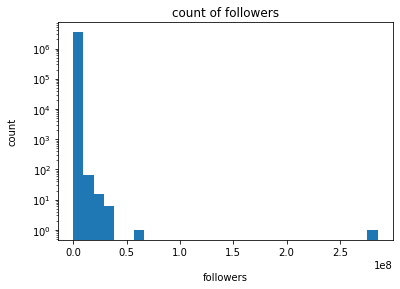

In [32]:
followers.plot(kind='hist',bins=30,logy=True)
plt.xlabel('followers',labelpad=15)
plt.ylabel('count',labelpad=15)
plt.title('count of followers')

* We continue the analysis with a summary of the main characteristics of the distribution. From the table below we can observe that the mean of the followers distribution is 4739.899180, a value that is way closer to the minimun of the distribution (0), than the maximum (285457645), and it's way bigger than the median of the distribution which equals to 406: this indicates as well that the distribution is asymmetrial and that there might be are some big outliers that influence the value of the mean. The first quantile is equal to 159 and the third equals 974, having an inter-quantile range of 815. From the boxplot below we can easily notice the maximum, being a huge outlier. 

<AxesSubplot:>

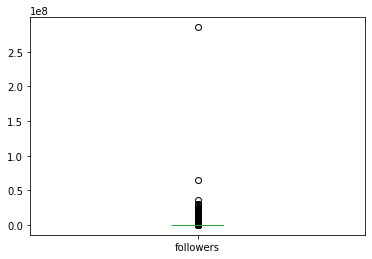

In [34]:
followers.plot(kind='box')

In [10]:
followers.describe().apply(lambda x: format(x, 'f'))

count      3452771.000000
mean          4739.899180
std         193908.709487
min              0.000000
25%            159.000000
50%            406.000000
75%            974.000000
max      285457645.000000
Name: followers, dtype: object

<b>8.4</b> What are histograms, bar plots, scatterplots and pie charts used for?

* An histogram is a graphical representation of a distribution of continuos numerical datas divided in classes, named bins, that can be of different dimentions. It's used to have a graphic representation of the frequency of each class compared to the others.
* The barplot, differently from the histogram, is used to plot cathegorical vriables, and it's used to visualize and compare the frequency of the analyzed phenomenon.
* The scatterplot is a plot that uses cartesian coordinates and it is used to visualize the value of two variables for a set of data. Each value is represented as a dot.
* The pie chart is a graph used to describe numerical proportion of a variable, similarly to the barplot but with a circular form.

<b>8.5</b> What insights can you extract from a Box Plot?

* The box plot is a graph that is used to show the quartiles, max, min, the range, the inter-quantile range, the skeweness and spread of numerical datas. It is also useful to locate outliers that are plotted as dots.